<a href="https://colab.research.google.com/github/aekamban/Portfolio/blob/main/Finance_Project_Revenue_Forecasting_for_Investment_Decisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **InstaMart Financial Planning and Investment Decisions**

--------------------
## **Context:**
--------------------

In the retail sector, financial forecasting is critical for optimizing investment decisions and ensuring sustainable profitability. Companies need to identify high-performing stores, evaluate revenue trends, and optimize expansion strategies. By leveraging historical sales data, financial analysts can assess the profitability of different locations and product categories, helping investors allocate resources effectively.

InstaMart, a national supermarket chain, is looking to improve its financial planning and investment decisions by forecasting revenue across its stores. By accurately predicting future revenue trends, the company aims to prioritize investments, optimize product pricing, and determine store expansion strategies.

---------------------------
## **Objective:**
----------------------------

InstaMart has hired a data science team to develop a predictive model that can forecast store-level revenue for the next quarter based on historical sales data. The insights gained from this model will help decision-makers:

Identify the most and least profitable stores to guide investment decisions.
Optimize pricing strategies by analyzing the relationship between MRP (Maximum Retail Price) and revenue.
Assess the financial impact of store size, location type, and product category on revenue.
Determine which stores are ideal for expansion based on profitability trends.
By implementing machine learning models (e.g., Time Series Forecasting, XGBoost, or LSTM), InstaMart can make data-driven financial decisions that enhance profitability and optimize resource allocation. 🚀



---------------------------------
## **Data Description:**
---------------------------------

The data contains the different attributes of the various products and stores. The detailed data dictionary is given below.

* Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
* Product_Weight - the weight of each product
* Product_Sugar_Content - sugar content of each product like low sugar, regular, and no sugar
* Product_Allocated_Area - the ratio of the allocated display area of each product to the total display area of all the products in a store
* Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
* Product_MRP - maximum retail price of each product
* Store_Id - unique identifier of each store
* Store_Establishment_Year - the year in which the store was established
* Store_Size - the size of the store depending on sq. feet like high, medium, and low
* Store_Location_City_Type - the type of city in which the store is located like Tier 1, Tier 2, and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
* Store_Type - the type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2, and Food Mart
* Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store

## **Importing the necessary libraries and overview of the dataset**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split the data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### **Importing the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mart = pd.read_csv("/content/drive/MyDrive/supermarket_data.csv")

In [ ]:
# Copying data to another variable to avoid any changes to original data
data = mart.copy()

### **View the first and last 5 rows of the dataset**

In [ ]:
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


**Observation:**

* Supermarket Type 1 & 2 stores in Tier 2 cities generate consistent revenue, suggesting they are stable investment opportunities.
* The Departmental Store in a Tier 1 city shows the highest revenue, indicating high consumer demand and strong return on investment.
* Smaller stores generate lower revenue, which may indicate higher risk and lower profitability potential for expansion.
* Higher allocated shelf space (e.g., Dairy at 14.4%) correlates with higher revenue, which can guide product placement decisions to maximize sales.

In [ ]:
data.tail()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82
8762,FD306,14.73,Low Sugar,0.177,Snack Foods,224.93,OUT002,1998,Small,Tier 3,Food Mart,2186.08


### **Remove the first three columns of product-specific data**

In [ ]:
# Remove the first three columns
data = data.iloc[:, 3:].copy()

print(data.head())


  Store_Id  Store_Establishment_Year Store_Size Store_Location_City_Type  \
0   OUT004                      2009     Medium                   Tier 2   
1   OUT003                      1999     Medium                   Tier 1   
2   OUT001                      1987       High                   Tier 2   
3   OUT001                      1987       High                   Tier 2   
4   OUT002                      1998      Small                   Tier 3   

           Store_Type  Product_Store_Sales_Total  
0   Supermarket Type2                    2842.40  
1  Departmental Store                    4830.02  
2   Supermarket Type1                    4130.16  
3   Supermarket Type1                    4132.18  
4           Food Mart                    2279.36  


### **Understand the shape of the dataset**

In [ ]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 8763 rows and 6 columns.


### **Check the data types of the columns for the dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store_Id                   8763 non-null   object 
 1   Store_Establishment_Year   8763 non-null   int64  
 2   Store_Size                 8763 non-null   object 
 3   Store_Location_City_Type   8763 non-null   object 
 4   Store_Type                 8763 non-null   object 
 5   Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 410.9+ KB


**Observations:**
* Store_Establishment_Year and Product_Store_Sales_Total are the numeric columns while the rest are object ones.
* There are a total of **8763 non-null observations in each of the columns**. This indicates that there are **no missing values** in the data.

### **Checking for missing values in the dataset**

In [ ]:
# Checking for missing values in the data
data.isnull().sum()

,0
Store_Id,0
Store_Establishment_Year,0
Store_Size,0
Store_Location_City_Type,0
Store_Type,0
Product_Store_Sales_Total,0


**Observation:**
* There are no missing values in the data.

In [ ]:
# Checking for duplicate values
data.duplicated().sum()

90

**Observation:**
* There are no duplicate values in the data.

## **Exploratory Data Analysis**

**Let's check the statistical summary of the data.**

In [ ]:
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store_Id,8763,4,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,8763.0,NaN,NaN,NaN,2002.032751,8.388381,1987.0,1998.0,2009.0,2009.0,2009.0
Store_Size,8763,3,Medium,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,8763,3,Tier 2,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,8763,4,Supermarket Type2,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Store_Sales_Total,8763.0,NaN,NaN,NaN,3464.00364,1065.630494,33.0,2761.715,3452.34,4145.165,8000.0


**Observations:**
- There are 4 unique stores in the dataset.
- The 75th percentile of Store_Id is 0. It indicates that the vast majority of these stores don't have a unique identifier.
- The mean store sales are approx. USD 34,640, whereas the median of the store sales is approx. USD 34,523. This indicates that the Product_Store_Sales_Total distribution is only slightly skewed towards the right side.

**Let's check the count of each unique category in each of the categorical variables**

In [ ]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing the count of each unique value
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Store_Id
OUT004    4676
OUT001    1586
OUT003    1349
OUT002    1152
Name: count, dtype: int64
--------------------------------------------------
Store_Size
Medium    6025
High      1586
Small     1152
Name: count, dtype: int64
--------------------------------------------------
Store_Location_City_Type
Tier 2    6262
Tier 1    1349
Tier 3    1152
Name: count, dtype: int64
--------------------------------------------------
Store_Type
Supermarket Type2     4676
Supermarket Type1     1586
Departmental Store    1349
Food Mart             1152
Name: count, dtype: int64
--------------------------------------------------


In [ ]:
data.head()

,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,OUT002,1998,Small,Tier 3,Food Mart,2279.36


### **Univariate Analysis**

In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    # Check if the feature exists in the DataFrame
    if feature not in data.columns:
        raise ValueError(f"Feature '{feature}' not found in the DataFrame.")

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )

**Store Location Distribution**

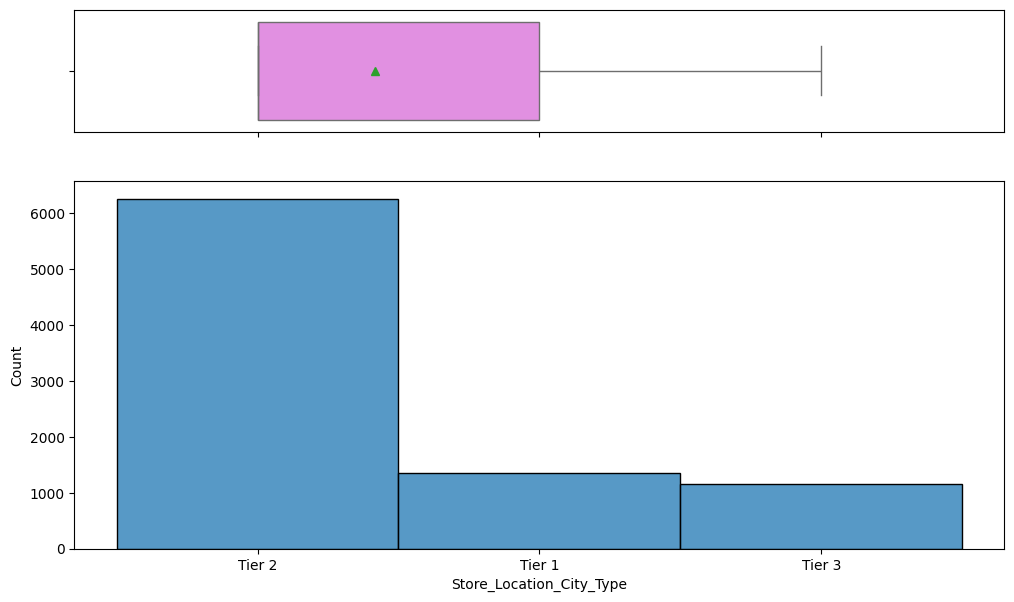

In [ ]:
histogram_boxplot(data, "Store_Location_City_Type")

**Observation**
- The distribution of store locations by city types is heavily skewed towards tier 2 cities

**Store Type Distribution**

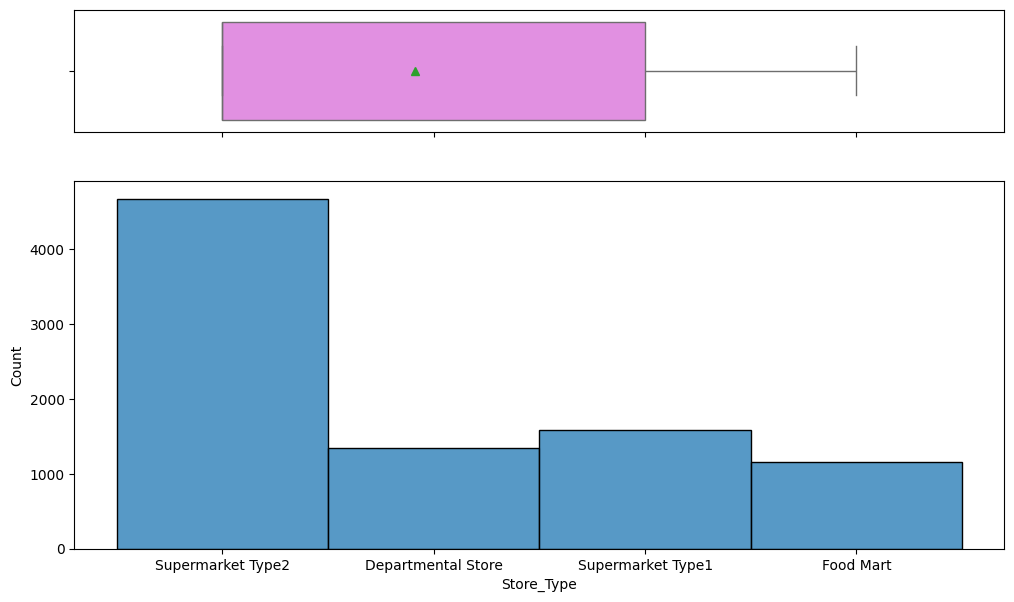

In [ ]:
histogram_boxplot(data, "Store_Type")

**Observation:**
- The distribution of store types is heavily skewed towards type 2 supermarkets

**Store Total Sales Distribution**

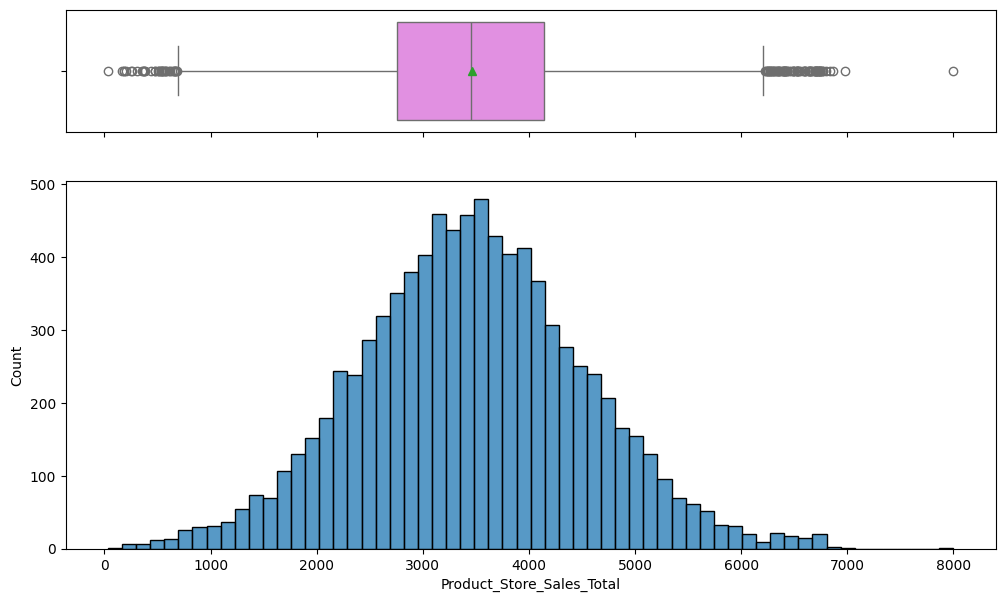

In [ ]:
histogram_boxplot(data, "Product_Store_Sales_Total")

**Observation:**
- The revenue generated from each product at a particular store is normally distributed with mean and median lying around 3500.

In [ ]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])            # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                              # Percentage of each class of the category
        else:
            label = p.get_height()         # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 # Annotate the percentage

    plt.show()                            # Show the plot

**Store ID Distribution**

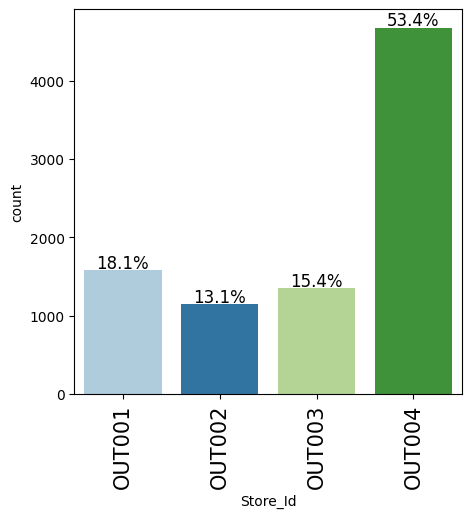

In [ ]:
labeled_barplot(data, "Store_Id", perc = True)

**Observations:**
- Around 53% of the products are being sold from outlet OUT004. An almost equal number of products have been sold from the other three stores each.
- When compared to the four Store_Ids the products, which are being sold from outlet OUT002 are low.

**Store Size Distribution**

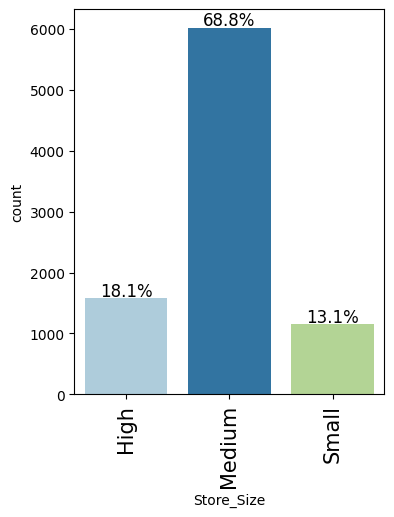

In [ ]:
labeled_barplot(data, "Store_Size", perc = True)

**Observations:**
- Around 69% of the products have been sold from the stores which are medium in size
- The products that have been sold from the stores which are high and small are almost the same in size.

**Store Location Distribution by City Type**

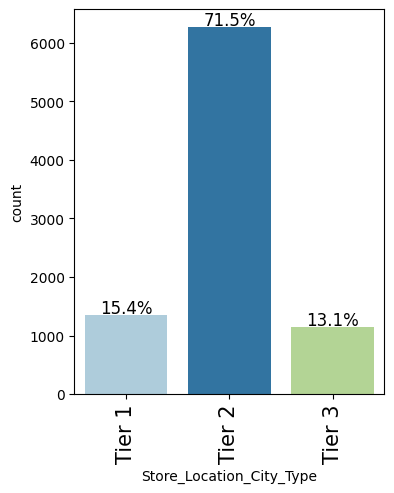

In [ ]:
labeled_barplot(data, "Store_Location_City_Type", perc = True)

**Observations:**
- Around 72% of the products have been sold from stores which are located in Tier 2 cities.
- The products that have been sold from the stores are located in Tier 1 and Tier 3 cities are almost the same.

**Store Type Distribution**

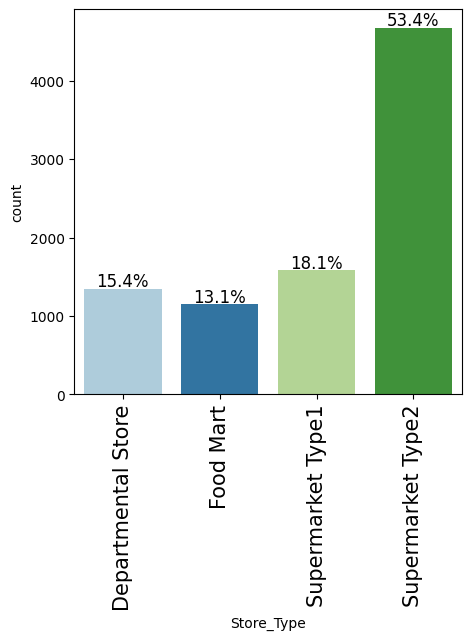

In [ ]:
labeled_barplot(data, "Store_Type", perc = True)

**Observations:**
- Around 53% of the products have been sold from stores that are of Supermarket Type2.
- The products that have been sold from stores which are of Supermarket Type1, Food Mart and Departmental Store are almost same.

### **Bivariate Analysis**

**Let us see from which type of stores and locations the revenue generation is more, starting with revenue by outlet**.

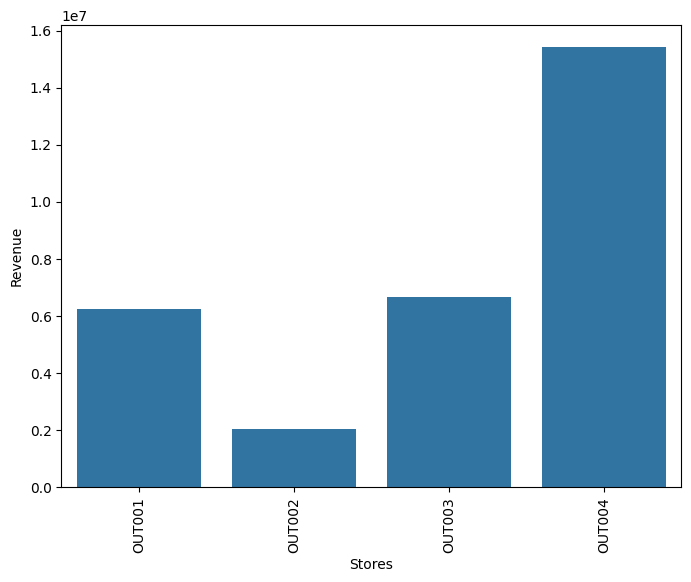

In [ ]:
df_store_revenue = data.groupby(["Store_Id"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
r = sns.barplot(
    x = df_store_revenue.Store_Id, y = df_store_revenue.Product_Store_Sales_Total
)
r.set_xlabel("Stores")
r.set_ylabel("Revenue")
plt.show()

**Observations:**
- OUTOO4 is contributing the most to the revenue of the company which is more than double the contribution being made by second-placed store OUT003.
- OUT002 is contributing the least to the revenue of the company which is two times less than OUT001 and OUT003.

**Next, let's look at revenue by store size**.

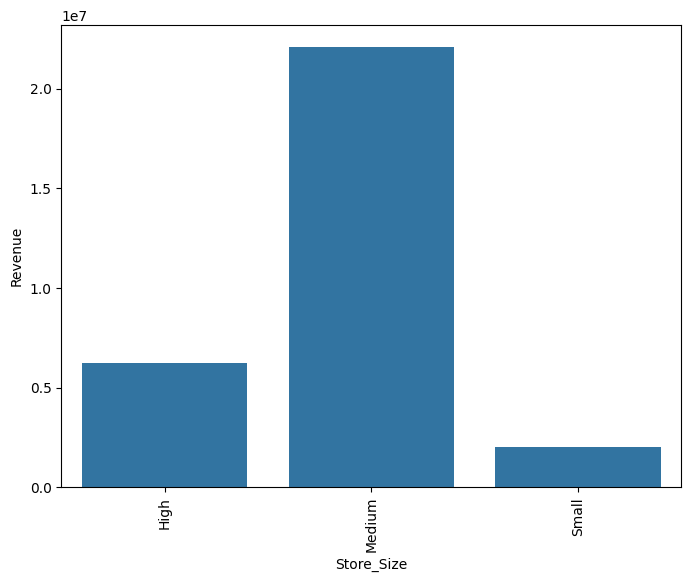

In [ ]:
df_revenue3 = data.groupby(["Store_Size"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
c = sns.barplot(x = df_revenue3.Store_Size, y = df_revenue3.Product_Store_Sales_Total)
c.set_xlabel("Store_Size")
c.set_ylabel("Revenue")
plt.show()

**Observations:**
- The medium-sized stores are contributing heavily to the revenue.
- The high-sized stores are contributing the least to the revenue.

**Now, let's examine revenue by store location city type**.

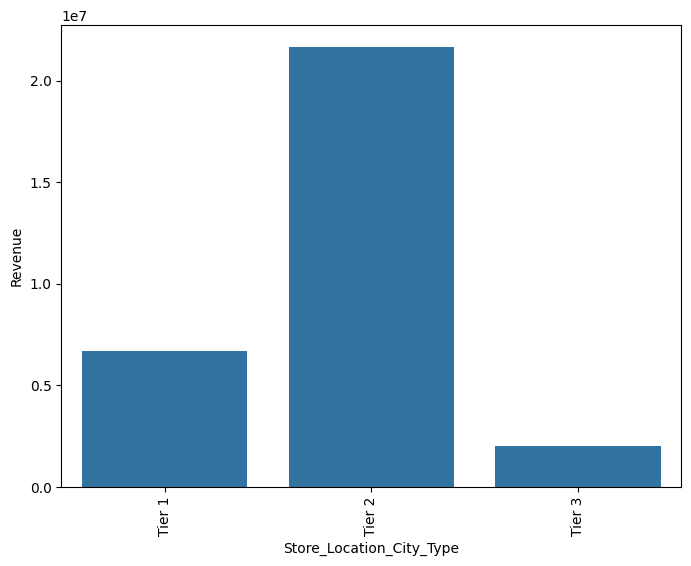

In [ ]:
df_revenue4 = data.groupby(["Store_Location_City_Type"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
d = sns.barplot(
    x = df_revenue4.Store_Location_City_Type, y = df_revenue4.Product_Store_Sales_Total
)
d.set_xlabel("Store_Location_City_Type")
d.set_ylabel("Revenue")
plt.show()

**Observations:**
- Stores in the Tier 2 cities are contributing the most to the revenue of InstaMart.
- Stores in the Tier 3 cities are contributing the least to the revenue of InstaMart.

**Let's compare revenue by store type**.

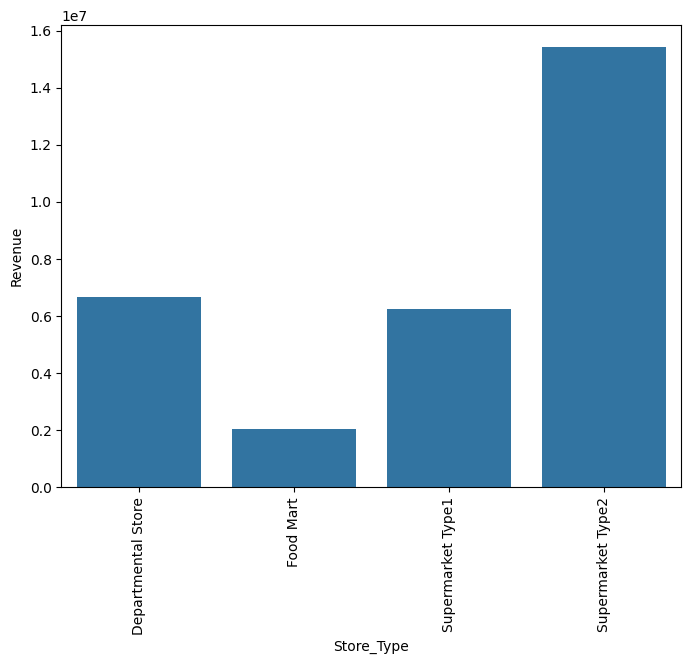

In [ ]:
df_revenue5 = data.groupby(["Store_Type"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
e = sns.barplot(x=df_revenue5.Store_Type, y = df_revenue5.Product_Store_Sales_Total)
e.set_xlabel("Store_Type")
e.set_ylabel("Revenue")
plt.show()

**Observations:**
- Stores of Supermarket Type 2 are performing exceptionally well.
- Stores of InstaMart Type 1 and Departmental Store are almost contributing the same revenue to the company.

**And finally, let's compare revenue by store establishment year**.

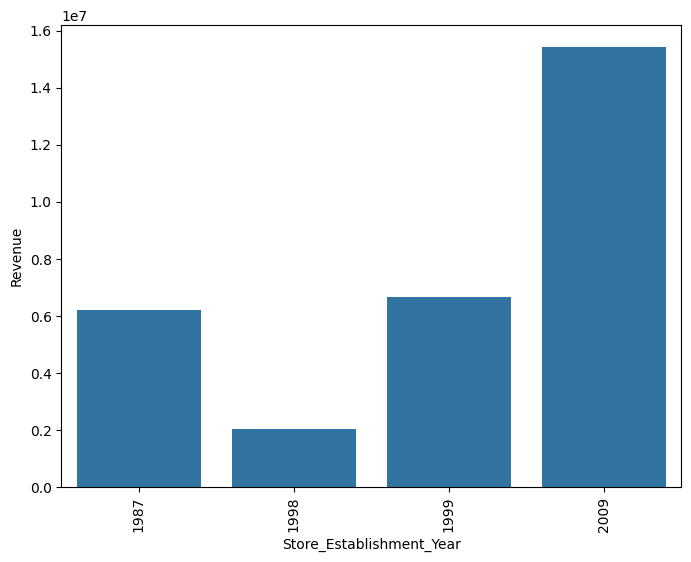

In [ ]:
df_revenue5 = data.groupby(["Store_Establishment_Year"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
e = sns.barplot(x=df_revenue5.Store_Establishment_Year, y = df_revenue5.Product_Store_Sales_Total)
e.set_xlabel("Store_Establishment_Year")
e.set_ylabel("Revenue")
plt.show()

**Observations:**
- Stores established in 2009 are contributing most to the revenue of InstaMart.
- Stores established in 1998 are contributing least to the revenue of InstaMart.

**Let's check the distribution of our target variable i.e Revenue with the other categorical columns**

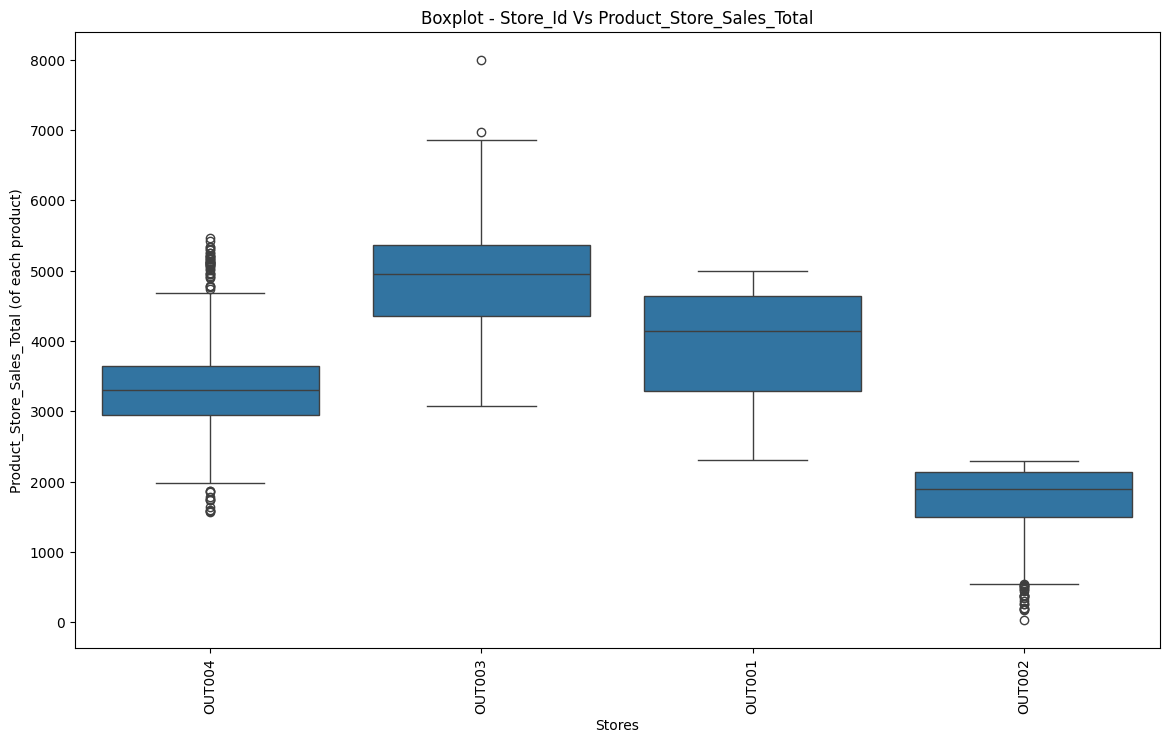

In [ ]:
plt.figure(figsize = [14, 8])
sns.boxplot(data = data, x = data.Store_Id, y = data.Product_Store_Sales_Total)
plt.xticks(rotation = 90)
plt.title("Boxplot - Store_Id Vs Product_Store_Sales_Total")
plt.xlabel("Stores")
plt.ylabel("Product_Store_Sales_Total (of each product)")
plt.show()

**Observations:**
- Although the number of products bought from OUT003 is around 15% only, however more costly goods have been bought from this store than the other stores. This shows that this is a premium store for the company.
- From the store OUT002 the low cost goods have been bought than the other stores. This store has less contribution to the company.

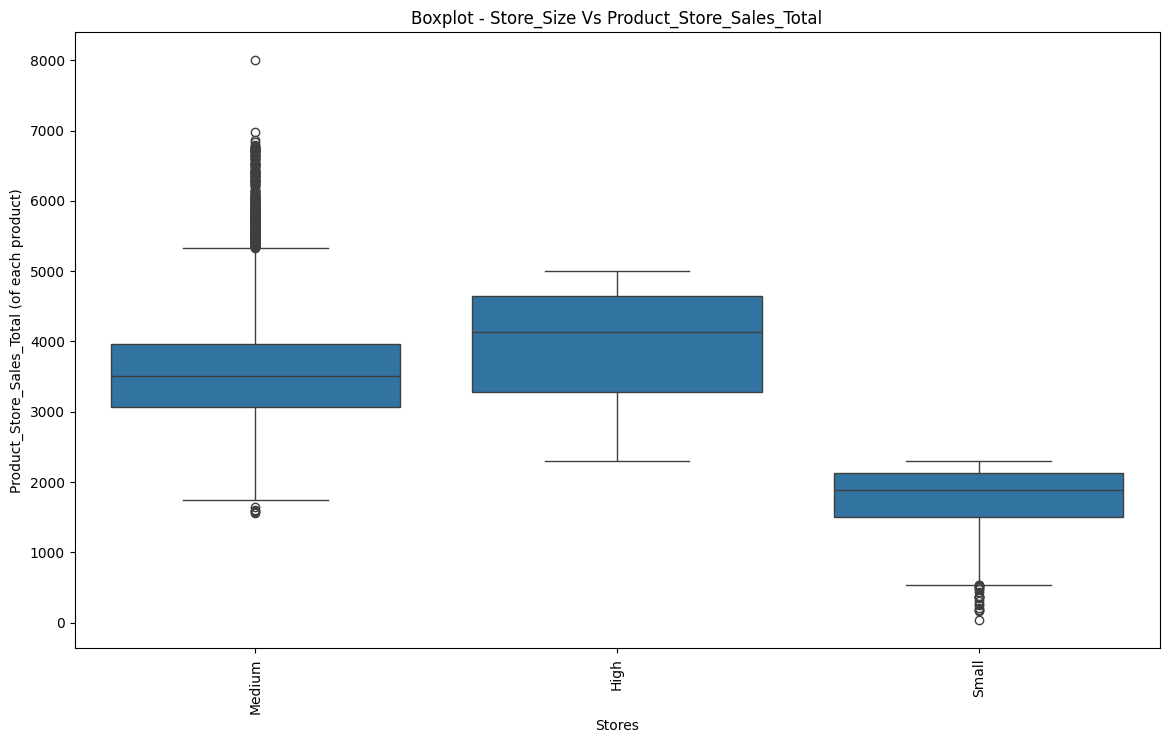

In [ ]:
plt.figure(figsize = [14, 8])
sns.boxplot(data = data, x = data.Store_Size, y = data.Product_Store_Sales_Total)
plt.xticks(rotation = 90)
plt.title("Boxplot - Store_Size Vs Product_Store_Sales_Total")
plt.xlabel("Stores")
plt.ylabel("Product_Store_Sales_Total (of each product)")
plt.show()

**Observation:**
- More costly goods have been bought from the stores which are high in size which seems to be quite logical.

**Let's delve deeper and do a detailed analysis of each of the stores**.

**OUT001**

In [ ]:
data.loc[data["Store_Id"] == "OUT001"].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store_Id,1586,1,OUT001,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1586.0,NaN,NaN,NaN,1987.0,0.0,1987.0,1987.0,1987.0,1987.0,1987.0
Store_Size,1586,1,High,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1586,1,Tier 2,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1586,1,Supermarket Type1,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Store_Sales_Total,1586.0,NaN,NaN,NaN,3923.778802,904.62901,2300.56,3285.51,4139.645,4639.4,4997.63


**Observations:**
- OUT001 is a store of Supermarket Type 1 which is located in a Tier 2 city and has a store size as high. It was established in 1987.
- The revenue generated from each product at OUT001 ranges from 2300 to 5000.


In [ ]:
data.loc[data["Store_Id"] == "OUT001", "Product_Store_Sales_Total"].sum()

6223113.18

**OUT002**

In [ ]:
data.loc[data["Store_Id"] == "OUT002"].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store_Id,1152,1,OUT002,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1152.0,NaN,NaN,NaN,1998.0,0.0,1998.0,1998.0,1998.0,1998.0,1998.0
Store_Size,1152,1,Small,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1152,1,Tier 3,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1152,1,Food Mart,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Store_Sales_Total,1152.0,NaN,NaN,NaN,1762.942465,462.862431,33.0,1495.4725,1889.495,2133.6225,2299.63


**Observations:**
- OUT002 is a food mart which is located in a Tier 3 city and has store size as small. It was established in 1998.
- The revenue generated from each product at OUT002 ranges from 33 to 2300.
- The frequency of each variable ranges from 168 to 1152.

In [ ]:
data.loc[data["Store_Id"] == "OUT002", "Product_Store_Sales_Total"].sum()

2030909.72

**OUT003**

In [ ]:
data.loc[data["Store_Id"] == "OUT003"].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store_Id,1349,1,OUT003,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1349.0,NaN,NaN,NaN,1999.0,0.0,1999.0,1999.0,1999.0,1999.0,1999.0
Store_Size,1349,1,Medium,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1349,1,Tier 1,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1349,1,Departmental Store,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Store_Sales_Total,1349.0,NaN,NaN,NaN,4946.966323,677.539953,3069.24,4355.39,4958.29,5366.59,8000.0


**Observations**
- OUT003 is a Departmental store which is located in a Tier 1 city and has a store size of medium. It was established in 1999.
- The revenue generated from each product at OUT003 ranges from 3070 to 8000.
- The frequency of all the variables is in the range of 186 to 1349.

In [ ]:
data.loc[data["Store_Id"] == "OUT003", "Product_Store_Sales_Total"].sum()

6673457.57

**OUT004**

In [ ]:
data.loc[data["Store_Id"] == "OUT004"].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store_Id,4676,1,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,4676.0,NaN,NaN,NaN,2009.0,0.0,2009.0,2009.0,2009.0,2009.0,2009.0
Store_Size,4676,1,Medium,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,4676,1,Tier 2,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,4676,1,Supermarket Type2,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Store_Sales_Total,4676.0,NaN,NaN,NaN,3299.312111,468.271692,1561.06,2942.085,3304.18,3646.9075,5462.86


**Observations:**
- OUT004 is a store of Supermarket Type2 which is located in a Tier 2 city and has store size as medium. It was established in 2009.
- The revenue generated from each product at OUT004 ranges from 1561 to 5463.
- The frequency of all the variables in OUT004 is in the range from 700 to 4676.

In [ ]:
data.loc[data["Store_Id"] == "OUT004", "Product_Store_Sales_Total"].sum()

15427583.43

## **Data Preprocessing**

### **Feature Engineering**

**A store that has been in the business for a long duration is more trustworthy than the newly established one. On the other hand, older stores may sometimes lack infrastructure if proper attention is not given. So let us calculate the current age of the store and incorporate that into our model.**

In [ ]:
# Outlet Age
data["Store_Age_Years"] = 2022 - data.Store_Establishment_Year

In [ ]:
data.head()

,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age_Years
0,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,13
1,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,23
2,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,35
3,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,35
4,OUT002,1998,Small,Tier 3,Food Mart,2279.36,24


### **Outlier Check**

- Let's check for outliers in the data.

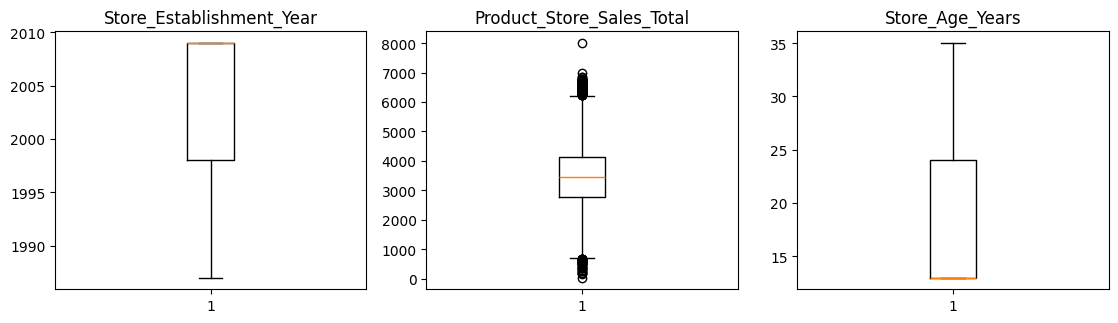

In [ ]:
# Outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize = (15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.

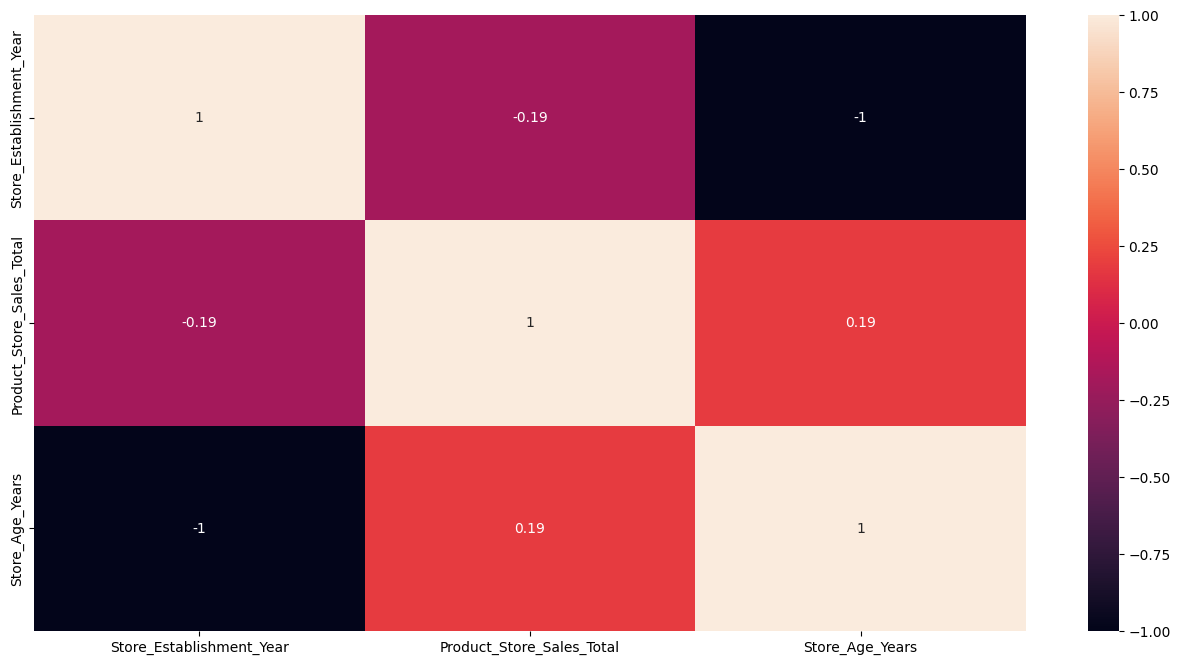

In [ ]:
plt.figure(figsize = (16, 8))
sns.heatmap(data.corr(numeric_only = True), annot = True)
plt.show()

**Observation:**
- We observe a small negative correlation between total store sales and store establishment year and the equal but opposite small positive correlation between total store sales and store age in years.

### **Data Preparation for modeling**

- We want to forecast Revenue (Product_Store_Sales_Total).
- Before we proceed to build a model, we'll have to encode categorical features and drop the unnecessary columns
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
data = data.drop(["Store_Establishment_Year"], axis = 1)

In [ ]:
data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [ ]:
# Separating features and the target column
X = data.drop(["Product_Store_Sales_Total"], axis = 1)
y = data["Product_Store_Sales_Total"]

In [ ]:
X = sm.add_constant(X)

In [ ]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 1)

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped/treated till all the features have a VIF score < 5

In [ ]:
X_train1 = X_train.astype(float)
y_train1 = y_train.astype(float)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(X_train1))

                            feature         VIF
0                             const    0.000000
1                   Store_Age_Years  690.127896
2                   Store_Id_OUT002         inf
3                   Store_Id_OUT003         inf
4                   Store_Id_OUT004         inf
5                 Store_Size_Medium         inf
6                  Store_Size_Small         inf
7   Store_Location_City_Type_Tier 2         inf
8   Store_Location_City_Type_Tier 3         inf
9              Store_Type_Food Mart         inf
10     Store_Type_Supermarket Type1         inf
11     Store_Type_Supermarket Type2         inf


**Observations:**
- The VIF for dummy variables can be ignored which is expected that they would have a high VIF.
- But the continuous variables should not have high VIF.

In [ ]:
X_train1 = X_train1.drop('Store_Age_Years',axis = 1)

X_test = X_test.drop('Store_Age_Years',axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train1))

                            feature           VIF
0                             const  0.000000e+00
1                   Store_Id_OUT002           inf
2                   Store_Id_OUT003  8.761364e+09
3                   Store_Id_OUT004  4.114958e+01
4                 Store_Size_Medium  7.005435e+01
5                  Store_Size_Small  2.533437e+04
6   Store_Location_City_Type_Tier 2  1.384622e+02
7   Store_Location_City_Type_Tier 3  2.169831e+05
8              Store_Type_Food Mart  2.169831e+05
9      Store_Type_Supermarket Type1           inf
10     Store_Type_Supermarket Type2  1.071437e+02


In [ ]:
X_train1.shape

(6134, 11)

In [ ]:
X_test.shape

(2629, 11)

## **Building Models**

Let's create a function to calculate the performance metrics for our regression model so that we don't need to use the same code repeatedly.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],

                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

In [ ]:
X_train1 = X_train1.astype(float)
y_train1 = y_train.astype(float)

# Create the model
model1 = sm.OLS(y_train1, X_train1).fit()

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.684
Model:                                   OLS   Adj. R-squared:                  0.684
Method:                        Least Squares   F-statistic:                     4422.
Date:                       Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                               01:15:20   Log-Likelihood:                -47922.
No. Observations:                       6134   AIC:                         9.585e+04
Df Residuals:                           6130   BIC:                         9.588e+04
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1.018e+14   3.14e+14      0.325      0.746   -5.13e+14    7.17e+14
Store_Id_OUT002                 -1.985e+14   6.12e+14     -0.325      0.746    -1.4e+15       1e+15
Store_Id_OUT003                  1.775e+14   5.47e+14      0.325      0.746   -8.94e+14    1.25e+15
Store_Id_OUT004                 -1.469e+14   4.53e+14     -0.325      0.746   -1.03e+15    7.41e+14
Store_Size_Medium               -2.793e+14   8.61e+14     -0.325      0.746   -1.97e+15    1.41e+15
Store_Size_Small                 3.223e+13   9.93e+13      0.325      0.746   -1.62e+14    2.27e+14
Store_Location_City_Type_Tier 2  5.986e+14   1.84e+15      0.325      0.746   -3.02e+15    4.21e+15
Store_Location_City_Type_Tier 3  3.223e+13   9.93e+13      0.325      0.746   -1.62e+14    2.27e+14
Store_Type_Food Mart             3.223e+13   9.93e+13      0.325      0.746   -1.62e+14    2.27e+14
Store_Type_Supermarket Type1    -7.004e+14   2.16e+15     -0.325      0.746   -4.93e+15    3.53e+15
Store_Type_Supermarket Type2    -2.741e+14   8.45e+14     -0.325      0.746   -1.93e+15    1.38e+15
==============================================================================
Omnibus:                      238.158   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              320.325
Skew:                          -0.403   Prob(JB):                     2.77e-70
Kurtosis:                       3.777   Cond. No.                     8.39e+31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.64e-60. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
X_train1.head()

,const,Store_Id_OUT002,Store_Id_OUT003,Store_Id_OUT004,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2
910,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7022,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8056,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2939,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
68,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_train1.shape

(6134, 11)

In [ ]:
# Checking model1 performance
model_pref(model1, X_train1, X_test)

    Data        RMSE         MAE        r2
0  Train  597.991273  467.104355  0.537245
1   Test  615.791017  482.664325  0.510973


**Observations:**
- The Train and the Test scores are very close to each other so we can say the model is not overfitting.
- However, the Test score is slightly better than the Train score. So, we might be able to get better performance if we increase the complexity of the model.

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [ ]:
residuals = model2.resid

np.mean(residuals)

-8.749718525839585

**Observation:**

- The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [ ]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [ ]:
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train1)

lzip(name, test)

[('F statistic', 0.9702511952417386), ('p-value', 0.7983166734016419)]

**Observation:**

- Since p-value > 0.05, we cannot reject the Null Hypothesis that the residuals are homoscedastic and the corresponding assumption is satisfied.

### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

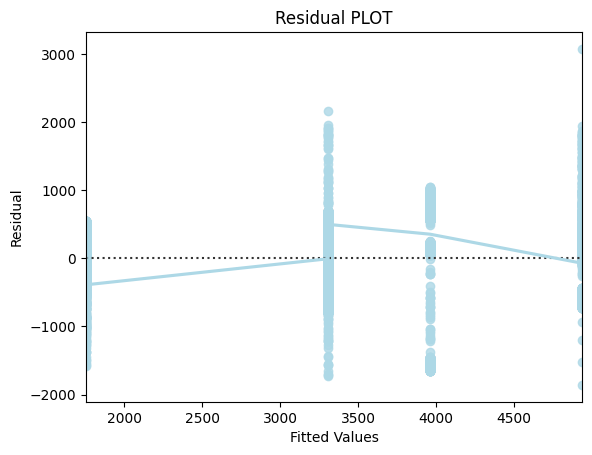

In [ ]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observation:**

- There is no pattern in the residual vs fitted values plot. Hence, the corresponding assumption is satisfied.

### **4. Normality of error terms**

The residuals should be normally distributed.

<Axes: ylabel='Count'>

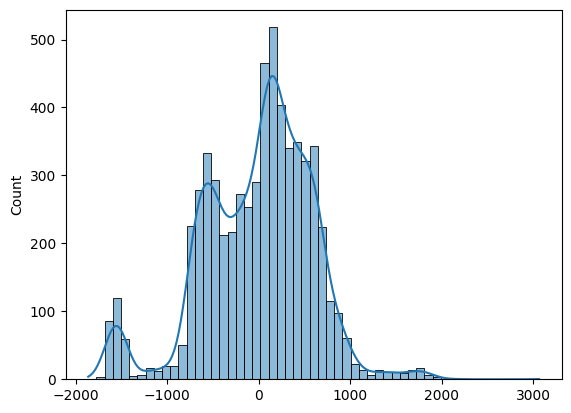

In [ ]:
# Plot histogram of residuals
sns.histplot(residuals, kde = True)

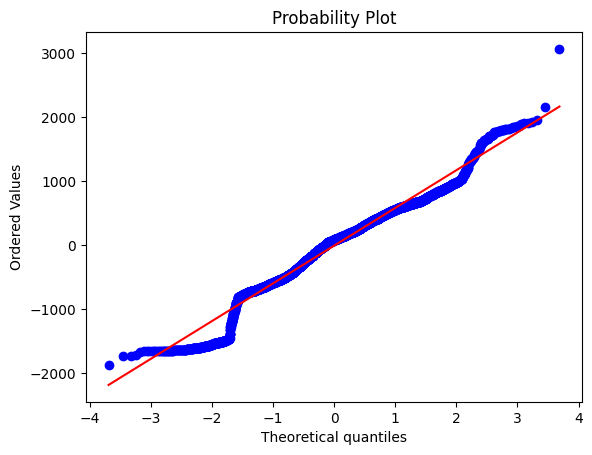

In [ ]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observation:**

- From the above plots, the residuals seem to follow a normal distribution. Hence, the corresponding assumption is satisfied. Now, we will check the model performance on the train and test datasets.

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

Let's check the performance of the model using the cross-validation technique from the scikit-learn library and see if the performance on the train and the test data is comparable to what we are getting after cross-validating the data.

In [ ]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.683 (+/- 0.031)
Mean Squared Error: 357821.113 (+/- 44501.957)


**Observation:**
- After applying cross-validation the model score has improved. We can compare it by the evaluation metric scores.

## **Actionable Insights and Business Recommendations**

- We can use this prediction model to predict the total sales that will be done by InstaMart in the next quarter.

- The model explains around 79% of the variation in the data.

- **OUT004** - OUT004, which is of Supermarket Type2, located in a Tier 2 city and having store size as medium, is performing well. InstaMart can look to increase the size of this store from medium to high. They can also look to set up stores in this type of city having comparable socio-economic conditions in order to expand their business and reach.

- **OUT002** - OUT002, being a food mart in a Tier 3 city and having small store size, is also performing well. InstaMart can look to upgrade its size or target similar cities for business expansion.

- **OUT001** - OUT001 which is a store of Supermarket Type 1, located in a Tier 2 city and having store size as high is not performing upto the mark. InstaMart can look to look build new marketing strategies (maybe give attractive discounts and offers) in this store in order to attract more customers.

- **OUT003** - Similar approach can be taken to increase the business of OUT003 which is a Departmental store in a Tier 1 city and having store size as medium. It is the premium store of the company where most of the costly goods are sold, so the correct set of audience should be targetted.

**Additional information that can be collected to gain better insights -**

- Customer preferences for types of products at different locations or during different seasons may have a significant impact on revenue.

- Customers' details like age and gender can be incorporated in this model so that the company gets to know their target audience well and can build their sales strategies according to that.

- The company should also keep a watch for the number of festive occasions present in a quarter so that they can strategize their inventory accordingly.

In [ ]:
# Convert file to html
!pip install nbconvert
!jupyter nbconvert --to html 'Finance Project: Revenue Forecasting for Investment Decisions.ipynb'

[NbConvertApp] WARNING | pattern 'Finance Project: Revenue Forecasting for Investment Decisions.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalen